# Import libraries

In [12]:
import pandas as pd

# Load Data Set

In [13]:
# Load data from a CSV file into a Pandas DataFrame
data = pd.read_csv("./Nasdaq.csv")
data

,Date,Close/Last,Volume,Open,High,Low
0,12/02/2022,$105.05,7916878,$102.02,$105.54,$101.82
1,12/01/2022,$103.37,7452313,$102.33,$103.56,$101.95
2,11/30/2022,$102.2,15000770,$99.05,$102.56,$98.52
3,11/29/2022,$98.66,4423921,$98.96,$99.33,$98.2
4,11/28/2022,$98.66,5257862,$98.99,$100.16,$98.56
...,...,...,...,...,...,...
121,06/10/2022,$75.67,8695476,$77.02,$77.79,$75.66
122,06/09/2022,$78.91,13248100,$77.97,$80.27,$77.73
123,06/08/2022,$78.47,5178253,$78.9,$79.7698,$78.26
124,06/07/2022,$79.47,5517101,$78.57,$79.75,$78.26


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        126 non-null    object
 1   Close/Last  126 non-null    object
 2   Volume      126 non-null    int64 
 3   Open        126 non-null    object
 4   High        126 non-null    object
 5   Low         126 non-null    object
dtypes: int64(1), object(5)
memory usage: 6.0+ KB


Remove '$' symbol from our dataset and convert to float

In [15]:
data['Close/Last'] = data['Close/Last'].str.replace('$', '').astype(float)
data['Open'] = data['Open'].str.replace('$', '').astype(float)
data['High'] = data['High'].str.replace('$', '').astype(float)
data['Low'] = data['Low'].str.replace('$', '').astype(float)
data['day']=pd.to_datetime(data['Date']).dt.day
data['mounth']=pd.to_datetime(data['Date']).dt.month
data['year']=pd.to_datetime(data['Date']).dt.year
data.drop(['Date'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  126 non-null    float64
 1   Volume      126 non-null    int64  
 2   Open        126 non-null    float64
 3   High        126 non-null    float64
 4   Low         126 non-null    float64
 5   day         126 non-null    int32  
 6   mounth      126 non-null    int32  
 7   year        126 non-null    int32  
dtypes: float64(4), int32(3), int64(1)
memory usage: 6.5 KB


In [16]:
data

,Close/Last,Volume,Open,High,Low,day,mounth,year
0,105.05,7916878,102.02,105.5400,101.82,2,12,2022
1,103.37,7452313,102.33,103.5600,101.95,1,12,2022
2,102.20,15000770,99.05,102.5600,98.52,30,11,2022
3,98.66,4423921,98.96,99.3300,98.20,29,11,2022
4,98.66,5257862,98.99,100.1600,98.56,28,11,2022
...,...,...,...,...,...,...,...,...
121,75.67,8695476,77.02,77.7900,75.66,10,6,2022
122,78.91,13248100,77.97,80.2700,77.73,9,6,2022
123,78.47,5178253,78.90,79.7698,78.26,8,6,2022
124,79.47,5517101,78.57,79.7500,78.26,7,6,2022


# Data

In [17]:
X=data.drop(['Volume'],axis=1)
y=data[['Volume']]

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y=scaler.fit_transform(y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)


c:\Users\carlo\anaconda3\envs\tensor\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

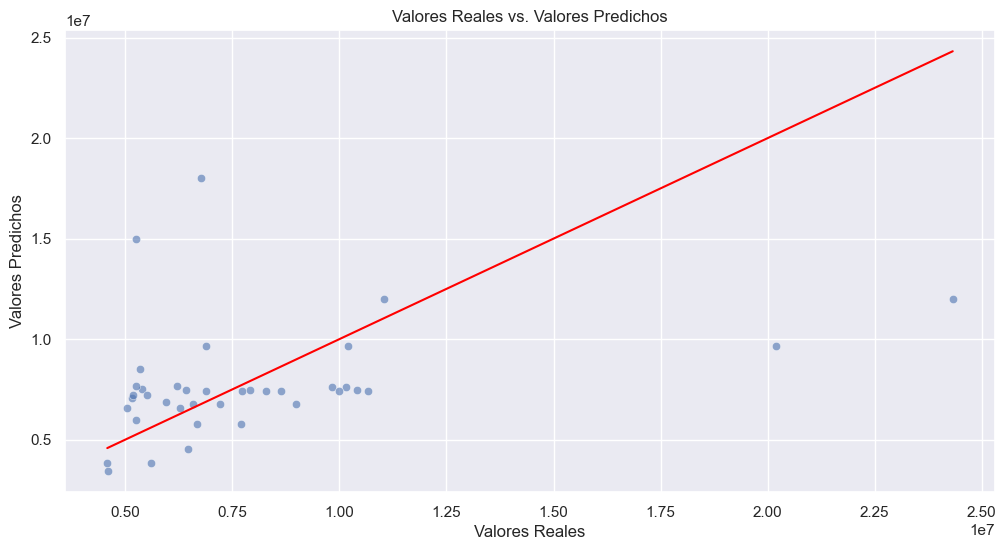

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir y_test y las predicciones a arrays unidimensionales
real_values = y_test.iloc[:, 0].values #Valores de Volumen
predict_values = clf.predict(X_test) #Valores predichos de Volumen

# Si predict_values es un DataFrame o un array bidimensional, también aplana:
if predict_values.ndim > 1:
    predict_values = predict_values[:, 0]

# Gráfico de dispersión de los valores reales vs. predichos
plt.figure(figsize=(12, 6))
sns.scatterplot(x=real_values, y=predict_values, alpha=0.6)
sns.lineplot(x=real_values, y=real_values, color='red')  # Línea de identidad (perfecta predicción)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.grid(True)
plt.show()


Importamos la clase para metricas

In [ ]:
from metricas import Metricas 

metricas= Metricas(real_values, predict_values)
metricas.mean_square()
metricas.root_mean_square()
metricas.mean_absolute()
metricas.relative_square()
metricas.relative_absolute()
metricas.correlation_coeficient()
metricas.determination_coeficient()
metricas.chi_square()

NameError: name 'real_values' is not defined

#